## EDA (Exploratory Data Analysis)

The dataset used in this study consists of voice recordings from individuals diagnosed with Parkinson’s Disease (PD) and those without the condition (Non-PD). Each individual contributed multiple short recordings of specific vocal sounds, following standardized prompts designed to capture speech-related biomarkers such as articulation, pitch stability, and phonatory control. The recordings are organized into labeled folders based on the diagnosis, with each folder containing subfolders for individual patients and their respective recordings. The data was collected under controlled conditions, with most samples averaging 6–8 seconds in duration. This structured and labeled dataset enables spectrogram-based analysis, forming the foundation for training and evaluating machine learning models aimed at early PD detection through voice analysis

In [ ]:
import os
from collections import Counter

root_dir = "/content/dataset"
class_counts = Counter()

for class_folder in ["pd", "non pd"]:
    folder_path = os.path.join(root_dir, class_folder)
    for patient_folder in os.listdir(folder_path):
        patient_path = os.path.join(folder_path, patient_folder)
        if os.path.isdir(patient_path):
            for record_folder in os.listdir(patient_path):
                record_path = os.path.join(patient_path, record_folder)
                if os.path.isdir(record_path):
                    class_counts[class_folder] += len(os.listdir(record_path))

print("Number of recordings per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

Number of recordings per class:
pd: 507
non pd: 580


Streaming output truncated to the last 5000 lines.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-26-1b57be043aff>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(os.path.join(record_path, file), sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-26-1b57be043aff>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(os.path.join(record_path, file), sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset,

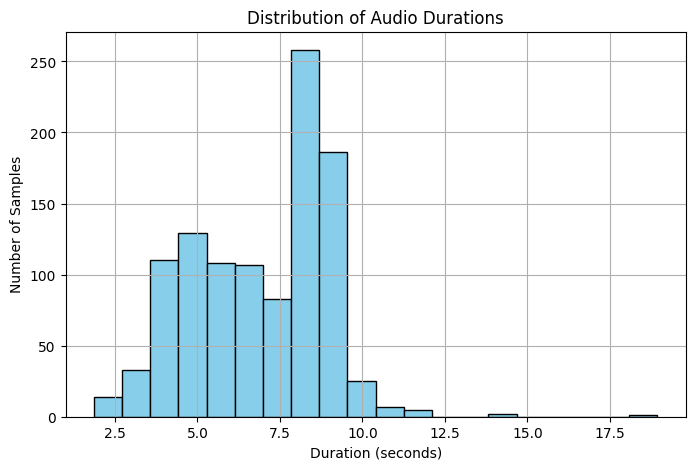

In [ ]:
import librosa
import matplotlib.pyplot as plt

durations = []
audio_exts = ('.wav', '.m4a', '.aac')

for class_folder in ["pd", "non pd"]:
    class_path = os.path.join(root_dir, class_folder)
    for patient_folder in os.listdir(class_path):
        patient_path = os.path.join(class_path, patient_folder)
        for record_folder in os.listdir(patient_path):
            record_path = os.path.join(patient_path, record_folder)
            for file in os.listdir(record_path):
                if file.endswith(audio_exts):
                    try:
                        y, sr = librosa.load(os.path.join(record_path, file), sr=None)
                        durations.append(librosa.get_duration(y=y, sr=sr))
                    except:
                        continue

plt.figure(figsize=(8, 5))
plt.hist(durations, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()